# ✨ The code behind the project

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

## 📅 The raw data

Data downloaded from [BVB](https://bvb.ro/)'s website ethically using their APIs.
* price history of all stocks from REGS and AERO between 2022-2023
* information on the stoks (issuer, market, industry, etc.) as of April 1, 2024.

In [2]:
price_df = pd.read_csv("data/BVB_close_price_history.csv")
price_df.describe()

timestamp         AAG         ALT          AQ       AROBS  \
count  5.200000e+02  520.000000  520.000000  520.000000  520.000000   
mean   1.672479e+09    3.444500    0.057588    0.744718    0.961714   
std    1.817438e+07    0.265908    0.012145    0.124740    0.085296   
min    1.641161e+09    2.800000    0.040500    0.540000    0.799000   
25%    1.656817e+09    3.200000    0.049500    0.650000    0.897750   
50%    1.672481e+09    3.500000    0.052500    0.708000    0.950000   
75%    1.688137e+09    3.640000    0.060600    0.880000    0.998000   
max    1.703801e+09    3.880000    0.089500    0.946000    1.250000   

             ARTE         BCM        BNET         BRK         BVB  ...   OMSE  \
count  520.000000  520.000000  520.000000  520.000000  520.000000  ...  520.0   
mean    13.710577    0.083847    0.286923    0.171179   40.804615  ...    5.0   
std      1.868361    0.007483    0.018988    0.053705   13.921829  ...    0.0   
min     11.200000    0.072500    0.244000    0.108200   23.400000  ...    5.0   
25%     12.500000    0.077500    0.279000    0.132200   28.075000  ...    5.0   
50%     13.100000    0.083250    0.290900    0.154250   36.000000  ...    5.0   
75%     14.300000    0.090000    0.296000    0.188100   50.250000  ...    5.0   
max     19.700000    0.099500    0.349100    0.313000   72.600000  ...    5.0   

        SIEP   STOZ   UPRR  AGCM          MECA     PRDI   TRVC          SIRJ  \
count  520.0  520.0  520.0   0.0  5.200000e+02  520.000  520.0  5.200000e+02   
mean     0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   
std      0.0    0.0    0.0   NaN  3.556135e-15    0.000    0.0  2.222584e-16   
min      0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   
25%      0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   
50%      0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   
75%      0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   
max      0.1   44.2    2.5   NaN  1.420000e+01    0.125    6.0  1.380000e+00   

        AUXI  
count  520.0  
mean    22.0  
std      0.0  
min     22.0  
25%     22.0  
50%     22.0  
75%     22.0  
max     22.0  

[8 rows x 329 columns]

In [3]:
price_df.head()

timestamp          dt   AAG     ALT      AQ  AROBS  ARTE     BCM    BNET  \
0  1641160800  2022-01-03  3.60  0.0539  0.9233  0.975  11.9  0.0980  0.3177   
1  1641247200  2022-01-04  3.56  0.0539  0.9233  1.010  11.5  0.0950  0.3255   
2  1641333600  2022-01-05  3.58  0.0539  0.9200  1.040  11.5  0.0950  0.3445   
3  1641420000  2022-01-06  3.54  0.0579  0.9167  1.040  11.5  0.0950  0.3491   
4  1641506400  2022-01-07  3.58  0.0539  0.9167  1.090  11.5  0.0895  0.3414   

     BRK  ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA   PRDI  TRVC  SIRJ  AUXI  
0  0.283  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
1  0.292  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
2  0.300  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
3  0.293  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
4  0.291  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  

[5 rows x 330 columns]

In [4]:
info_df = pd.read_csv("data/BVB_share_info.csv")
info_df.head()

symbol          isin                share_name  total_shares  face_value  \
0    AAG  ROAAGEACNOR7                AAGES S.A.      10000000        0.20   
1    ALR  ROALROACNOR0                 ALRO S.A.     713779135        0.50   
2    ALT  ROALTCACNOR1                ALTUR S.A.     306048670        0.10   
3    ALU  ROALUMACNOR8  ALUMIL ROM INDUSTRY S.A.      31250000        0.20   
4     AQ  RO7066ZEA1R9      AQUILA PART PROD COM    1200002400        0.15   

  segment market      tier     status              company_name fiscal_code  \
0     BSE   REGS  STANDARD  TRADEABLE            S.C AAGES S.A.     1196550   
1     BSE   REGS   PREMIUM  TRADEABLE                 ALRO S.A.     1515374   
2     BSE   REGS  STANDARD  TRADEABLE                ALTUR S.A.     1520249   
3     BSE   REGS  STANDARD  TRADEABLE  ALUMIL ROM INDUSTRY S.A.    10042631   
4     BSE   REGS   PREMIUM  TRADEABLE      AQUILA PART PROD COM     6484554   

    district country_iso2  caen_code  \
0      MURES           RO     2711.0   
1        OLT           RO     2442.0   
2        OLT           RO     2932.0   
3  BUCURESTI           RO     4672.0   
4    PRAHOVA           RO     4690.0   

                                              sector  \
0                                      MANUFACTURING   
1                                      MANUFACTURING   
2                                      MANUFACTURING   
3  WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...   
4  WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...   

                                            industry  
0  MANUFACTURE OF ELECTRIC MOTORS, GENERATORS, TR...  
1  MANUFACTURE OF BASIC PRECIOUS AND OTHER NON-FE...  
2  MANUFACTURE OF PARTS AND ACCESSORIES FOR MOTOR...  
3                        OTHER SPECIALISED WHOLESALE  
4                    NON-SPECIALISED WHOLESALE TRADE

## 🔎 EDA & Pre-processing price data

* **Missing data**: *weekends* are not considered and there are *stocks which were never traded* or the close price of these did not change (see below) » these were not deleted from the dataset, as these will be isolated nodes in the network. Deleting these would mean removing from the learning algorithm isolated nodes.
  
* **Duplicated data**: n/a, it was an assumption that data comes correctly with the API of BVB ✅

* Data in the **wide data format** (i.e. each stock on different columns) » this is the expected format of the `corr` function ✅

👉 No "regular" data transformation needed.

👉 For the modeling part the dataset must:
* be ordered by date (to calculate the stock returns)
* contain only the numeric data of the stocks » timestamp and date must be dropped

In [5]:
# Stocks which were never traded

print("Stocks with missing trade info:")
price_df.columns[price_df.isna().all()]

Stocks with missing trade info:


Index(['AGCM'], dtype='object')

In [6]:
# Stocks wich have been traded somewhen, but in the period 2022-2023 these were not or even if these were traded, the close price remained constant

print("Stocks with unchanging close price:")
price_df.columns[price_df.min() == price_df.max()]

Stocks with unchanging close price:


Index(['CMBU', 'SIFI', 'ALCQ', 'ANIM', 'BADE', 'FOSP', 'METT', 'NAXY', 'OMSE',
       'SIEP', 'STOZ', 'UPRR', 'MECA', 'PRDI', 'TRVC', 'SIRJ', 'AUXI'],
      dtype='object')

In [7]:
# Drop timestamp & dt columns after ordering by these
price_df = price_df.sort_values(by="dt").drop(columns=["timestamp", "dt"])
price_df

AAG     ALT      AQ  AROBS  ARTE     BCM    BNET     BRK   BVB    CBC  \
0    3.60  0.0539  0.9233  0.975  11.9  0.0980  0.3177  0.2830  25.4   17.1   
1    3.56  0.0539  0.9233  1.010  11.5  0.0950  0.3255  0.2920  25.2   17.1   
2    3.58  0.0539  0.9200  1.040  11.5  0.0950  0.3445  0.3000  25.4   19.2   
3    3.54  0.0579  0.9167  1.040  11.5  0.0950  0.3491  0.2930  25.2   22.0   
4    3.58  0.0539  0.9167  1.090  11.5  0.0895  0.3414  0.2910  25.7   25.2   
..    ...     ...     ...    ...   ...     ...     ...     ...   ...    ...   
515  3.66  0.0790  0.9200  0.939  16.4  0.0990  0.2790  0.1490  64.4  150.0   
516  3.66  0.0790  0.9200  0.939  16.4  0.0990  0.2790  0.1490  64.4  150.0   
517  3.70  0.0830  0.9200  0.943  16.4  0.0995  0.2770  0.1505  65.4  152.0   
518  3.70  0.0825  0.9180  0.944  16.4  0.0995  0.2800  0.1485  65.4  152.0   
519  3.74  0.0825  0.9200  0.944  16.4  0.0990  0.2780  0.1495  65.6  144.0   

     ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA   PRDI  TRVC  SIRJ  AUXI  
0    ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
1    ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
2    ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
3    ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
4    ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
..   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   ...  
515  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
516  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
517  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
518  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  
519  ...   5.0   0.1  44.2   2.5   NaN  14.2  0.125   6.0  1.38  22.0  

[520 rows x 328 columns]

## 🕸️ Modeling the stock network

The stock network was modeled by following the well-established state of the art, by considering the threshold method on the correlation of the stock returns.

* Step 1: Calculate stock returns: $return(t) = ln[\frac{p_{c,i}(t)}{p_{c,i}(t-1)}]$, where $p_{c,i}(t)$ is the close price of stock $i$ on day $t$ <span style="color:grey">*Note: the first value ($t_0$) will be with NaN (no previous data), and hence 1 data point of each stock will be missed*</span>
* Step 2: Calculate cross-correlation ($c_{i,j}$) » the Pearson correlation among the returns of all pairs of stocks 
  $$c_{ij} = \frac{\Sigma_t[(x_i(t) - \overline{x_i}) * (x_j(t) - \overline{x_j})]}{\sqrt{\Sigma_t(x_i(t) - \overline{x_i})^2} * \sqrt{\Sigma_t(x_j(t) - \overline{x_j})^2}}$$
* Step 3: Define a threshold ($thd$) and construct the adjacency matrix by applying the logic below. <span style="color:grey">*Adjacency matrix ~ in the case of an undirected and unweighted network a symmetric matrix that has value 1 if an edge exists among two nodes. We take the absolute value of the correlation because for us the direction (negative vs positive) doesn't matters, only the strength of correlation.*</span>
$$
\begin{equation}
A_{i,j} = 
    \begin{cases}
        1,\ if\ abs(corr_{i,j}) > thd \\
        0,\ otherwise
    \end{cases}
\end{equation}
$$
* Step 4: Using the `networkx` Python library construct the network

### 🪜 Step 1: Stock returns

In [8]:
# example of shifted values

ex_df = pd.concat(
    [
        price_df[["AAG"]],
        price_df[["AAG"]].rename({"AAG":"shifted_AAG"}, axis=1).shift(periods=1)
    ],
    axis=1
)

ex_df["price_change"] = ex_df["AAG"] / ex_df["shifted_AAG"]
ex_df["stock_return"] = np.log(ex_df["price_change"])
ex_df

AAG  shifted_AAG  price_change  stock_return
0    3.60          NaN           NaN           NaN
1    3.56         3.60      0.988889     -0.011173
2    3.58         3.56      1.005618      0.005602
3    3.54         3.58      0.988827     -0.011236
4    3.58         3.54      1.011299      0.011236
..    ...          ...           ...           ...
515  3.66         3.66      1.000000      0.000000
516  3.66         3.66      1.000000      0.000000
517  3.70         3.66      1.010929      0.010870
518  3.70         3.70      1.000000      0.000000
519  3.74         3.70      1.010811      0.010753

[520 rows x 4 columns]

In [9]:
# Step 1: Calculate stock returns
# Row with index 0 is NaN because t_0 has no previous data

price_returns_df = np.log(price_df / price_df.shift(periods=1))
price_returns_df

AAG       ALT        AQ     AROBS      ARTE       BCM      BNET  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   -0.011173  0.000000  0.000000  0.035268 -0.034191 -0.031091  0.024255   
2    0.005602  0.000000 -0.003581  0.029270  0.000000  0.000000  0.056732   
3   -0.011236  0.071587 -0.003593  0.000000  0.000000  0.000000  0.013264   
4    0.011236 -0.071587  0.000000  0.046957  0.000000 -0.059638 -0.022304   
..        ...       ...       ...       ...       ...       ...       ...   
515  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
516  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
517  0.010870  0.049393  0.000000  0.004251  0.000000  0.005038 -0.007194   
518  0.000000 -0.006042 -0.002176  0.001060  0.000000  0.000000  0.010772   
519  0.010753  0.000000  0.002176  0.000000  0.000000 -0.005038 -0.007168   

          BRK       BVB       CBC  ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA  \
0         NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1    0.031307 -0.007905  0.000000  ...   0.0   0.0   0.0   0.0   NaN   0.0   
2    0.027029  0.007905  0.115832  ...   0.0   0.0   0.0   0.0   NaN   0.0   
3   -0.023610 -0.007905  0.136132  ...   0.0   0.0   0.0   0.0   NaN   0.0   
4   -0.006849  0.019647  0.135802  ...   0.0   0.0   0.0   0.0   NaN   0.0   
..        ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
515  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   NaN   0.0   
516  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   NaN   0.0   
517  0.010017  0.015409  0.013245  ...   0.0   0.0   0.0   0.0   NaN   0.0   
518 -0.013378  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   NaN   0.0   
519  0.006711  0.003053 -0.054067  ...   0.0   0.0   0.0   0.0   NaN   0.0   

     PRDI  TRVC  SIRJ  AUXI  
0     NaN   NaN   NaN   NaN  
1     0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...  
515   0.0   0.0   0.0   0.0  
516   0.0   0.0   0.0   0.0  
517   0.0   0.0   0.0   0.0  
518   0.0   0.0   0.0   0.0  
519   0.0   0.0   0.0   0.0  

[520 rows x 328 columns]

### 🪜 Step 2: Cross-Correlation

[Pandas' `corr` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) computes pairwise correlation of columns.

👉 It excludes by default the NaN values » ✅ scalability: newly listed stocks can have also correlation calculated, no need to have for each pair of data the same period

🗒️ The correlation of constants is undefined (constant = no variance in data), hence `corr` produces NaN values » ⚠️ these will appear as isolated stocks in the network

In [10]:
# calculate cross-correlations (values between -1 and 1)

price_returns_corr_df = price_returns_df.corr()
price_returns_corr_df

AAG       ALT        AQ     AROBS      ARTE       BCM      BNET  \
AAG    1.000000  0.021437  0.109946  0.209587  0.028562 -0.004688  0.133092   
ALT    0.021437  1.000000  0.169763  0.095479  0.028267  0.125860  0.058229   
AQ     0.109946  0.169763  1.000000  0.344755  0.112385  0.136902  0.201747   
AROBS  0.209587  0.095479  0.344755  1.000000  0.058861  0.046404  0.290334   
ARTE   0.028562  0.028267  0.112385  0.058861  1.000000  0.027707  0.003127   
...         ...       ...       ...       ...       ...       ...       ...   
MECA        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
PRDI        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TRVC        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
SIRJ        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
AUXI        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            BRK       BVB       CBC  ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA  \
AAG    0.051996  0.084084 -0.020452  ...   NaN   NaN   NaN   NaN   NaN   NaN   
ALT    0.147872  0.063895  0.147601  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AQ     0.341462  0.265919  0.060252  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AROBS  0.351593  0.198362  0.075823  ...   NaN   NaN   NaN   NaN   NaN   NaN   
ARTE   0.023630  0.064876 -0.041291  ...   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
MECA        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
PRDI        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
TRVC        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
SIRJ        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AUXI        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

       PRDI  TRVC  SIRJ  AUXI  
AAG     NaN   NaN   NaN   NaN  
ALT     NaN   NaN   NaN   NaN  
AQ      NaN   NaN   NaN   NaN  
AROBS   NaN   NaN   NaN   NaN  
ARTE    NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...  
MECA    NaN   NaN   NaN   NaN  
PRDI    NaN   NaN   NaN   NaN  
TRVC    NaN   NaN   NaN   NaN  
SIRJ    NaN   NaN   NaN   NaN  
AUXI    NaN   NaN   NaN   NaN  

[328 rows x 328 columns]

In [11]:
# calculate the absolute value of cross-correlations (values between 0 and 1) -> only strength matters, direction does not
price_returns_corr_df = abs(price_returns_corr_df)
price_returns_corr_df

AAG       ALT        AQ     AROBS      ARTE       BCM      BNET  \
AAG    1.000000  0.021437  0.109946  0.209587  0.028562  0.004688  0.133092   
ALT    0.021437  1.000000  0.169763  0.095479  0.028267  0.125860  0.058229   
AQ     0.109946  0.169763  1.000000  0.344755  0.112385  0.136902  0.201747   
AROBS  0.209587  0.095479  0.344755  1.000000  0.058861  0.046404  0.290334   
ARTE   0.028562  0.028267  0.112385  0.058861  1.000000  0.027707  0.003127   
...         ...       ...       ...       ...       ...       ...       ...   
MECA        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
PRDI        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TRVC        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
SIRJ        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
AUXI        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            BRK       BVB       CBC  ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA  \
AAG    0.051996  0.084084  0.020452  ...   NaN   NaN   NaN   NaN   NaN   NaN   
ALT    0.147872  0.063895  0.147601  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AQ     0.341462  0.265919  0.060252  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AROBS  0.351593  0.198362  0.075823  ...   NaN   NaN   NaN   NaN   NaN   NaN   
ARTE   0.023630  0.064876  0.041291  ...   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
MECA        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
PRDI        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
TRVC        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
SIRJ        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
AUXI        NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

       PRDI  TRVC  SIRJ  AUXI  
AAG     NaN   NaN   NaN   NaN  
ALT     NaN   NaN   NaN   NaN  
AQ      NaN   NaN   NaN   NaN  
AROBS   NaN   NaN   NaN   NaN  
ARTE    NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...  
MECA    NaN   NaN   NaN   NaN  
PRDI    NaN   NaN   NaN   NaN  
TRVC    NaN   NaN   NaN   NaN  
SIRJ    NaN   NaN   NaN   NaN  
AUXI    NaN   NaN   NaN   NaN  

[328 rows x 328 columns]

#### ✨ Some interesting facts on the correlation of Romanian stocks

In [12]:
# assets with constant prices » the same as our expectation from above

constant_priced_assets = list(price_returns_corr_df.loc[price_returns_corr_df.isna().sum(axis=1) == len(price_returns_corr_df)].index)
print("nr of constants which have nan correlation:", len(constant_priced_assets))
print("these stocks are:", ", ".join(constant_priced_assets))

nr of constants which have nan correlation: 18
these stocks are: CMBU, SIFI, ALCQ, ANIM, BADE, FOSP, METT, NAXY, OMSE, SIEP, STOZ, UPRR, AGCM, MECA, PRDI, TRVC, SIRJ, AUXI


In [13]:
print("Average correlation among stocks:", price_returns_corr_df.mean().mean())
print("Median correlation among stocks:", price_returns_corr_df.median().median())
print("Minimum correlation among stocks:", price_returns_corr_df.min().min())
print("Maximum correlation among stocks:", price_returns_corr_df.max().max())

Average correlation among stocks: 0.044921890135938475
Median correlation among stocks: 0.026362188186041934
Minimum correlation among stocks: 4.184547971745199e-21
Maximum correlation among stocks: 1.0


<Axes: >

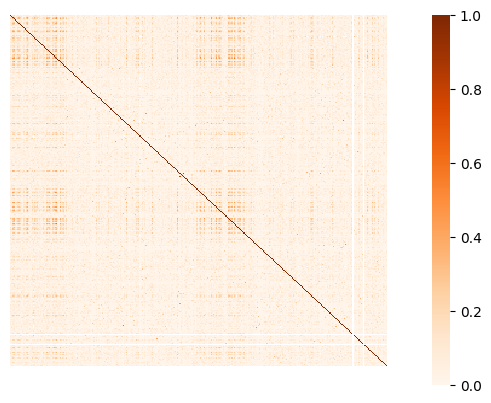

In [14]:
# observe that the plot is colored mainly light orange (i.e. small correlation)
# correlation of 1 on the diagonal because each stock is correlated by itself to the maximum

import seaborn as sns
sns.heatmap(price_returns_corr_df, cmap="Oranges", xticklabels='', yticklabels='')

🛠️ Set the correlation values to 0 on the diagonal » in the network modeling step no self-joins will be made ✅

In [15]:
for node in price_returns_corr_df.index:
        price_returns_corr_df.loc[node, node] = 0

🛠️ Set the Nan correlation values to 0 » the network threshold will be certainly greater than 0, so no edges will be considered for these stocks that have constant prices and returns ✅

In [16]:
price_returns_corr_df.fillna(0, inplace=True)
price_returns_corr_df

AAG       ALT        AQ     AROBS      ARTE       BCM      BNET  \
AAG    0.000000  0.021437  0.109946  0.209587  0.028562  0.004688  0.133092   
ALT    0.021437  0.000000  0.169763  0.095479  0.028267  0.125860  0.058229   
AQ     0.109946  0.169763  0.000000  0.344755  0.112385  0.136902  0.201747   
AROBS  0.209587  0.095479  0.344755  0.000000  0.058861  0.046404  0.290334   
ARTE   0.028562  0.028267  0.112385  0.058861  0.000000  0.027707  0.003127   
...         ...       ...       ...       ...       ...       ...       ...   
MECA   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
PRDI   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
TRVC   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SIRJ   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
AUXI   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            BRK       BVB       CBC  ...  OMSE  SIEP  STOZ  UPRR  AGCM  MECA  \
AAG    0.051996  0.084084  0.020452  ...   0.0   0.0   0.0   0.0   0.0   0.0   
ALT    0.147872  0.063895  0.147601  ...   0.0   0.0   0.0   0.0   0.0   0.0   
AQ     0.341462  0.265919  0.060252  ...   0.0   0.0   0.0   0.0   0.0   0.0   
AROBS  0.351593  0.198362  0.075823  ...   0.0   0.0   0.0   0.0   0.0   0.0   
ARTE   0.023630  0.064876  0.041291  ...   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
MECA   0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
PRDI   0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
TRVC   0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
SIRJ   0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
AUXI   0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   

       PRDI  TRVC  SIRJ  AUXI  
AAG     0.0   0.0   0.0   0.0  
ALT     0.0   0.0   0.0   0.0  
AQ      0.0   0.0   0.0   0.0  
AROBS   0.0   0.0   0.0   0.0  
ARTE    0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...  
MECA    0.0   0.0   0.0   0.0  
PRDI    0.0   0.0   0.0   0.0  
TRVC    0.0   0.0   0.0   0.0  
SIRJ    0.0   0.0   0.0   0.0  
AUXI    0.0   0.0   0.0   0.0  

[328 rows x 328 columns]

In [18]:
print("The 10 most correlated stocks:")

correlation_values = {}

for stock1, value_arrays in price_returns_corr_df.to_dict().items():
    for stock2, value in value_arrays.items():
        if stock1 < stock2:
            label = stock1 + " - " + stock2
        else:
            label = stock2 + " - " + stock1

        if label not in correlation_values:
            correlation_values[label] = value

# TRP in the TOP 6 times => if the value of this changes, the other stocks' values change as well
sorted(correlation_values.items(), key=lambda i: i[1], reverse=True)[:10]

The 10 most correlated stocks:


[('SOTA - TRNG', 0.7729563219356833),
 ('M - TRP', 0.6057166496810479),
 ('GHIM - SPTU', 0.5696748763678938),
 ('TLV - TRP', 0.5339863999536523),
 ('ONE - TRP', 0.5111366106722104),
 ('BRD - TLV', 0.5042851448568377),
 ('AROBS - TRP', 0.49843325104173686),
 ('COCR - UCET', 0.48339145106106457),
 ('TRP - WINE', 0.4824606817980051),
 ('AQ - TRP', 0.48110469916108956)]

### 🪜Step 3: Define the threshold and the adjacency matrix

🚀 [Skipped part] » to define the threshold objectively, for each threshold value between 0.00 and 1.00 a different stock network was defined. Following different experiments on how the network properties change depending on the threshold, the chosen threshold that best models the stock market was 0.15. In this Demo Notebook only the modeling with this threshold is showcased.

To construct the adjecency matrix [the `mask` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) was used from Pandas, which replaces the values in the matrix where a condition is True.

In [19]:
# threshold chosen based on experiments not detailed in this demo notebook
thd = 0.15

In [20]:
# create the adj matrix
price_returns_corr_df = price_returns_corr_df.mask(price_returns_corr_df < thd, other=0)
price_returns_corr_df = price_returns_corr_df.mask(price_returns_corr_df >= thd, other=1)
price_returns_corr_df

AAG  ALT   AQ  AROBS  ARTE  BCM  BNET  BRK  BVB  CBC  ...  OMSE  SIEP  \
AAG    0.0  0.0  0.0    1.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
ALT    0.0  0.0  1.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
AQ     0.0  1.0  0.0    1.0   0.0  0.0   1.0  1.0  1.0  0.0  ...   0.0   0.0   
AROBS  1.0  0.0  1.0    0.0   0.0  0.0   1.0  1.0  1.0  0.0  ...   0.0   0.0   
ARTE   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...    ...   ...  ...   ...  ...  ...  ...  ...   ...   ...   
MECA   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
PRDI   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
TRVC   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
SIRJ   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   
AUXI   0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0   0.0   

       STOZ  UPRR  AGCM  MECA  PRDI  TRVC  SIRJ  AUXI  
AAG     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ALT     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
AQ      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
AROBS   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
ARTE    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
MECA    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
PRDI    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
TRVC    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
SIRJ    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
AUXI    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[328 rows x 328 columns]

### 🪜Step 4: Construct the network based on the adj matrix

For every network-related processing [the `networkx` Python library](https://networkx.org/documentation/stable/reference/index.html) is used.

In [21]:
stock_network = nx.from_pandas_adjacency(price_returns_corr_df)

#### 🔎 The network at a glance

In Python it is hard to visualize networks, more appropriate is to use Gephi, that we will see in a bit. There are also some other Python libraries that can be used to visualize networks for e.g. Bokeh, Plotly.

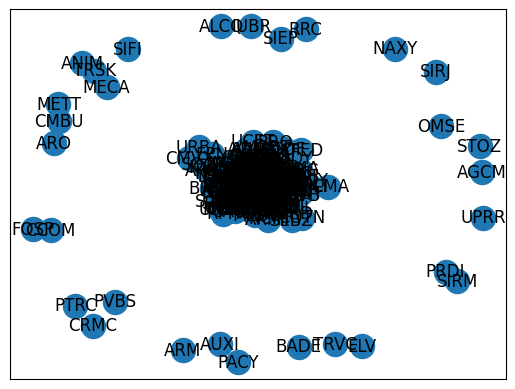

In [22]:
nx.draw_networkx(stock_network)

Extract some properties of the network

In [23]:
print("Number of nodes:", len(stock_network))
print("Number of edges:", len(stock_network.edges()))
print("---")

print("Number of isolated nodes:", len(list(nx.isolates(stock_network))))
print("These nodes are:", list(nx.isolates(stock_network)))
print("Node loss because of isolation:", len(list(nx.isolates(stock_network))) / len(stock_network))
print("---")

print("Edge density:", nx.density(stock_network))
print("Average clustering coefficient:", nx.average_clustering(stock_network))

print("---")
stock_network_degrees = dict(nx.degree(stock_network))
print("Minimum degree (k_min):", min(stock_network_degrees.values())),
print("Maximum degree (k_max):", max(stock_network_degrees.values())),
print("Average degree (k_avg):",  2 * len(stock_network.edges()) / len(stock_network))

Number of nodes: 328
Number of edges: 2089
---
Number of isolated nodes: 30
These nodes are: ['CCOM', 'PACY', 'PTRC', 'SIRM', 'TRSK', 'ARM', 'ARO', 'RRC', 'CRMC', 'IUBR', 'PVBS', 'ELV', 'CMBU', 'SIFI', 'ALCQ', 'ANIM', 'BADE', 'FOSP', 'METT', 'NAXY', 'OMSE', 'SIEP', 'STOZ', 'UPRR', 'AGCM', 'MECA', 'PRDI', 'TRVC', 'SIRJ', 'AUXI']
Node loss because of isolation: 0.09146341463414634
---
Edge density: 0.038953531737152235
Average clustering coefficient: 0.2374835340025486
---
Minimum degree (k_min): 0
Maximum degree (k_max): 80
Average degree (k_avg): 12.737804878048781


#### 📤Export the network into a format readable by Gephi software 

In [24]:
nx.write_gexf(stock_network, "data/stock_network_original.gexf")

## 🌈 Add attributes to the network

The network by itself and its numeric properties can tell a lot. But as the famous saying highlights, a picture worths thousands words. This is the same in the case of networks: through visualization new points of view can be discovered. Nodes and edges by themselves are not enough to uncover meaningful patterns / connections / insights on the stock market.

🔎 Perspective of analysis in this thesis:
* by market
* by industry
* if the node belongs to BET or not

👉 Stock info data needs pre-processing for this

#### 🛠️ Add the market attribute to the network

In [25]:
info_df.market.value_counts()

market
AERO    245
REGS     83
Name: count, dtype: int64

In [26]:
attribute_dict = {node: {"market": market} for node, market in info_df.set_index("symbol")["market"].to_dict().items()}
attribute_dict

{'AAG': {'market': 'REGS'},
 'ALR': {'market': 'REGS'},
 'ALT': {'market': 'REGS'},
 'ALU': {'market': 'REGS'},
 'AQ': {'market': 'REGS'},
 'ARM': {'market': 'REGS'},
 'AROBS': {'market': 'REGS'},
 'ARS': {'market': 'REGS'},
 'ARTE': {'market': 'REGS'},
 'ATB': {'market': 'REGS'},
 'BCM': {'market': 'REGS'},
 'BIO': {'market': 'REGS'},
 'BNET': {'market': 'REGS'},
 'BRD': {'market': 'REGS'},
 'BRK': {'market': 'REGS'},
 'BRM': {'market': 'REGS'},
 'BVB': {'market': 'REGS'},
 'CAOR': {'market': 'REGS'},
 'CBC': {'market': 'REGS'},
 'CEON': {'market': 'REGS'},
 'CMCM': {'market': 'REGS'},
 'CMF': {'market': 'REGS'},
 'CMP': {'market': 'REGS'},
 'CNTE': {'market': 'REGS'},
 'COMI': {'market': 'REGS'},
 'COTE': {'market': 'REGS'},
 'CRC': {'market': 'REGS'},
 'DIGI': {'market': 'REGS'},
 'EBS': {'market': 'REGS'},
 'ECT': {'market': 'REGS'},
 'EFO': {'market': 'REGS'},
 'EL': {'market': 'REGS'},
 'ELGS': {'market': 'REGS'},
 'ELJ': {'market': 'REGS'},
 'ELMA': {'market': 'REGS'},
 'ENP': {

#### 🛠️ Add the sector attribute to the network

There are too many different sectors, some also with only a few occurancies » aggregate low-frequency sectors into the "Others" group and clean the others. The main sectors:
* MANUFACTURING
* FINANCIAL AND INSURANCE ACTIVITIES
* WHOLESALE AND RETAIL TRADE
* REAL ESTATE ACTIVITIES
* CONSTRUCTION
* Others 

In [27]:
# too many sectors
info_df.sector.value_counts()

sector
MANUFACTURING                                                           130
WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VEHICLES AND MOTORCYCLES     40
CONSTRUCTION                                                             24
FINANCIAL AND INSURANCE ACTIVITIES                                       21
REAL ESTATE ACTIVITIES                                                   21
ACCOMMODATION AND FOOD SERVICE ACTIVITIES                                20
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES                        15
INFORMATION AND COMMUNICATION                                            13
TRANSPORTATION AND STORAGE                                               13
AGRICULTURE, FORESTRY AND FISHING                                        10
MINING AND QUARRYING                                                      8
ELECTRICITY, GAS, STEAM AND AIR CONDITIONING SUPPLY                       3
ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES                             2
WATER

In [28]:
# map the sectors to main sectors

main_sectors = [
    "MANUFACTURING",
    "FINANCIAL AND INSURANCE ACTIVITIES",
    "WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VEHICLES AND MOTORCYCLES",
    "REAL ESTATE ACTIVITIES",
    "CONSTRUCTION"
]

info_df['masked_sector'] = info_df.sector.map(lambda sector: sector if sector in main_sectors else "OTHERS")

info_df['masked_sector'] = info_df.masked_sector.replace("WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VEHICLES AND MOTORCYCLES",  "WHOLESALE AND RETAIL TRADE")

print("Distribution of stocks on industry:")
info_df["masked_sector"].value_counts(normalize=True)

Distribution of stocks on industry:


masked_sector
MANUFACTURING                         0.396341
OTHERS                                0.280488
WHOLESALE AND RETAIL TRADE            0.121951
CONSTRUCTION                          0.073171
FINANCIAL AND INSURANCE ACTIVITIES    0.064024
REAL ESTATE ACTIVITIES                0.064024
Name: proportion, dtype: float64

In [29]:
# add sector attribute
for node, val in info_df.set_index("symbol")["masked_sector"].to_dict().items():
    attribute_dict[node]["sector"] = val
attribute_dict

{'AAG': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'ALR': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'ALT': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'ALU': {'market': 'REGS', 'sector': 'WHOLESALE AND RETAIL TRADE'},
 'AQ': {'market': 'REGS', 'sector': 'WHOLESALE AND RETAIL TRADE'},
 'ARM': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'AROBS': {'market': 'REGS', 'sector': 'OTHERS'},
 'ARS': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'ARTE': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'ATB': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'BCM': {'market': 'REGS', 'sector': 'OTHERS'},
 'BIO': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'BNET': {'market': 'REGS', 'sector': 'OTHERS'},
 'BRD': {'market': 'REGS', 'sector': 'FINANCIAL AND INSURANCE ACTIVITIES'},
 'BRK': {'market': 'REGS', 'sector': 'FINANCIAL AND INSURANCE ACTIVITIES'},
 'BRM': {'market': 'REGS', 'sector': 'MANUFACTURING'},
 'BVB': {'market': 'REGS', 'sector': 'FINANCIAL AND INSURANCE ACTIVITI

In [30]:
print("Distribution of stocks on market and industry:")
info_df.groupby(["market"])["masked_sector"].value_counts(normalize=True)

Distribution of stocks on market and industry:


market  masked_sector                     
AERO    MANUFACTURING                         0.383673
        OTHERS                                0.281633
        WHOLESALE AND RETAIL TRADE            0.146939
        REAL ESTATE ACTIVITIES                0.085714
        CONSTRUCTION                          0.081633
        FINANCIAL AND INSURANCE ACTIVITIES    0.020408
REGS    MANUFACTURING                         0.433735
        OTHERS                                0.277108
        FINANCIAL AND INSURANCE ACTIVITIES    0.192771
        CONSTRUCTION                          0.048193
        WHOLESALE AND RETAIL TRADE            0.048193
Name: proportion, dtype: float64

## 🤖 A little bit of machine learning

✨ Scope: predict the movement of the next-day close prices based on network properties.

🔗 The input data of the algorithms are properties of the stock network extracted with the sliding window technique with size of 60 observations. Basically the strategy is to:
* Step 1: extract the period of the sliding window (i.e. a sub-dataset of 60 observations)
* Step 2: create a network for the sub-dataset
* Step 3: extract the 5 network properties for each node
* Step 4: define the target variable

🚀 [Skipped part]: extraction showcased only for the first sliding window extract, doing it for all is time consuming. However, the final input dataset containing all the extracted values is copied in the data folder.

⚙️ After splitting the data to test-train perserving the chronological meaning of data, 3 algorithms were trained and compared using performance metrics:
* Logistic Regression
* SVC
* Decision Tree until it converges

🚀 [Skipped part]: training multiple decision trees with different split depths to identify the best one without overfitting

* Decision Tree with 4 splits depth which was chosen the best model to predict the movement of the next-day close prices

⚠️ Deficiency: The network was trained based on correlation, and we derived some data from the network. Correlation is does not necessarily mean causation, therefore the expectations on the algorithm's performance wasn't great. However, because the derived data refers to the network properties and interaction among nodes, the performance was improved.

#### 🔗 Data extraction example

In [31]:
# this part is exactly the same as the steps showed in the previous chapter of Modeling
def build_stock_network_corr_matrix(df: pd.DataFrame):
    """From a df DataFrame which is like a time series, the function returns a correlation matrix after it applies ln (x_i / x_i-1) normalization. The correlation values are in absolute value.

    Args:
        df (pd.DataFrame): The initial dataset

    Returns:
        pd.DataFrame: contains the correlations among the stocks
    """
    norm_trading_df = np.log(df / df.shift(periods=1))
    trading_corr_df = norm_trading_df.corr()

    trading_corr_df = abs(trading_corr_df)

    return trading_corr_df.copy()   

def create_network(corr_df:pd.DataFrame, thd:float) -> nx.Graph:
    """Creates an undirected stock network where those nodes will be linked which have the pair-wise crosscorrelation >= thd. Self-joins are not allowed among nodes.

    Args:
        corr_df (pd.DataFrame): the correlation DataFrame on the time series data.
        thd (float): the threshold
    
    Returns:
        nx.Graph: the created stock network as networkx Graph instance
    """

    # mask the corr dataframe based on the thd value
    corr_df = corr_df.mask(corr_df < thd, other=0)
    corr_df = corr_df.mask(corr_df >= thd, other=1)
    
    # if there are nans, replace them with 0
    corr_df.fillna(0, inplace=True)
    
    # on the diagonal everywhere should be 0
    for node in corr_df.index:
        corr_df.loc[node, node] = 0
    
    # create the stock network
    return nx.from_pandas_adjacency(corr_df)

In [32]:
def extract_node_properties(stock_network: nx.Graph):
    """Extracts the clustering coefficient, degree centrality, closeness centrality, eigenvector centrality and betweenness centrality measures for each node of the given network.

    Args:
        stock_network (nx.Graph): the already created stock network based on the cross-correlation of the stocks.
    
    Returns:
        dict: a dictionary holding the extracted properties for each node. The keys are the names of the nodes in the network and the values are a dictionary holding the network properties' values in the clustering_coefficient, degree_centrality, closeness_centrality, betweenness_centrality and eigenvector_centrality keys.
    """
 
    stock_network_clustering = nx.clustering(stock_network)
    degree_centrality = nx.degree_centrality(stock_network)
    closeness_centrality = nx.closeness_centrality(stock_network)
    betweenness_centrality = nx.betweenness_centrality(stock_network)
    eigenvector_centrality = nx.eigenvector_centrality(stock_network)

    input_variables = {}

    for node in stock_network.nodes():
        input_variables[node] = {
            "clustering_coefficient": stock_network_clustering[node],
            "degree_centrality": degree_centrality[node],
            "closeness_centrality": closeness_centrality[node],
            "betweenness_centrality": betweenness_centrality[node],
            "eigenvector_centrality": eigenvector_centrality[node]
        }

    return input_variables

In [33]:
def extract_target_class(df: pd.DataFrame):
    """Based on the last two rows of the dataframe define the target class. If the value on first row < value on second row, the returned value will be "decrease", if it is larger, it will be "increase" and if the two are equal, then "stagnate"

    Args:
        df (pd.DataFrame): dataframe containing the prices in increasing time.
    
    Returns:
        dict: a dictionary holding for each column "decrease", "increase" or "stagnate".
    """

    df_class = df.iloc[-2:]
    
    return df_class.mask(df_class < df_class.shift(periods=1), other="decrease")\
    .mask(df_class > df_class.shift(periods=1), other="increase")\
    .mask(df_class == df_class.shift(periods=1), other="stagnate")\
    .iloc[-1].to_dict()

In [34]:
price_df = pd.read_csv("data/BVB_close_price_history.csv")
price_df.drop(columns=["timestamp"], inplace=True)
price_df["norm_dt"] = pd.to_datetime(price_df.dt)

sliding_window = 60 # trading days
train_test_data_sliding_w = []

for index in range(len(price_df) - sliding_window):
    # 1. get the sub-df according to sliding window
    source_trading_df = price_df.iloc[index:index+sliding_window].copy()

    min_date = source_trading_df["norm_dt"].min() 
    max_date = source_trading_df["norm_dt"].max()

    source_trading_df.drop(columns=["norm_dt", "dt"], inplace=True)

    # 2. create a network from it
    stock_network = create_network(corr_df=build_stock_network_corr_matrix(df=source_trading_df), thd=thd)

    # 3. extract the input variables
    stock_network_properties = extract_node_properties(stock_network=stock_network)

    # 4. extract the target variable
    target = extract_target_class(df=source_trading_df)

    # 5. combine the input variables with target variable
    for node in stock_network_properties:
        if target[node] in ['decrease', 'increase', 'stagnate']:

            stock_prediction = stock_network_properties[node]
            stock_prediction["target_class"] = target[node]
            stock_prediction["iteration_index"] = index
            stock_prediction["min_date"] = min_date
            stock_prediction["max_date"] = max_date
            stock_prediction["stock"] = node

            train_test_data_sliding_w.append(stock_prediction)
    
    break

In [35]:
pd.DataFrame(train_test_data_sliding_w)

clustering_coefficient  degree_centrality  closeness_centrality  \
0                  0.595426           0.388379              0.523290   
1                  0.519380           0.394495              0.525994   
2                  0.684020           0.455657              0.554658   
3                  0.616003           0.474006              0.563877   
4                  0.575313           0.336391              0.501378   
..                      ...                ...                   ...   
315                0.000000           0.000000              0.000000   
316                0.000000           0.000000              0.000000   
317                0.000000           0.000000              0.000000   
318                0.000000           0.000000              0.000000   
319                0.000000           0.000000              0.000000   

     betweenness_centrality  eigenvector_centrality target_class  \
0                  0.002972            7.874549e-02     increase   
1                  0.005416            7.458587e-02     stagnate   
2                  0.001424            9.931513e-02     increase   
3                  0.003412            9.804356e-02     decrease   
4                  0.003339            6.630846e-02     increase   
..                      ...                     ...          ...   
315                0.000000            2.536847e-16     stagnate   
316                0.000000            2.536847e-16     stagnate   
317                0.000000            2.536847e-16     stagnate   
318                0.000000            2.536847e-16     stagnate   
319                0.000000            2.536847e-16     stagnate   

     iteration_index   min_date   max_date  stock  
0                  0 2022-01-03 2022-03-25    AAG  
1                  0 2022-01-03 2022-03-25    ALT  
2                  0 2022-01-03 2022-03-25     AQ  
3                  0 2022-01-03 2022-03-25  AROBS  
4                  0 2022-01-03 2022-03-25   ARTE  
..               ...        ...        ...    ...  
315                0 2022-01-03 2022-03-25   MECA  
316                0 2022-01-03 2022-03-25   PRDI  
317                0 2022-01-03 2022-03-25   TRVC  
318                0 2022-01-03 2022-03-25   SIRJ  
319                0 2022-01-03 2022-03-25   AUXI  

[320 rows x 10 columns]

🪄 Please note that clustering_coefficient, degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality and target_class columns will be used, all others are for debugging purposes

In [36]:
feature_columns = ['clustering_coefficient', 'degree_centrality', 'closeness_centrality','betweenness_centrality','eigenvector_centrality']
target_column = "target_class"

##### 📊 The full data input

In [37]:
sliding_60_df = pd.read_csv("data/input_data_sliding_window_60.csv")
sliding_60_df

degree  clustering_coefficient  degree_centrality  \
0          127                0.595426           0.388379   
1          129                0.519380           0.394495   
2          149                0.684020           0.455657   
3          155                0.616003           0.474006   
4          110                0.575313           0.336391   
...        ...                     ...                ...   
149597       0                0.000000           0.000000   
149598       0                0.000000           0.000000   
149599       0                0.000000           0.000000   
149600       0                0.000000           0.000000   
149601       0                0.000000           0.000000   

        closeness_centrality  betweenness_centrality  eigenvector_centrality  \
0                   0.523290                0.002972            7.874549e-02   
1                   0.525994                0.005416            7.458587e-02   
2                   0.554658                0.001424            9.931513e-02   
3                   0.563877                0.003412            9.804356e-02   
4                   0.501378                0.003339            6.630846e-02   
...                      ...                     ...                     ...   
149597              0.000000                0.000000            3.037062e-16   
149598              0.000000                0.000000            3.037062e-16   
149599              0.000000                0.000000            3.037062e-16   
149600              0.000000                0.000000            3.037062e-16   
149601              0.000000                0.000000            3.037062e-16   

       target_class  iteration_index    min_date    max_date  stock  \
0          increase                0  2022-01-03  2022-03-25    AAG   
1          stagnate                0  2022-01-03  2022-03-25    ALT   
2          increase                0  2022-01-03  2022-03-25     AQ   
3          decrease                0  2022-01-03  2022-03-25  AROBS   
4          increase                0  2022-01-03  2022-03-25   ARTE   
...             ...              ...         ...         ...    ...   
149597     stagnate              459  2023-10-06  2023-12-28   MECA   
149598     stagnate              459  2023-10-06  2023-12-28   PRDI   
149599     stagnate              459  2023-10-06  2023-12-28   TRVC   
149600     stagnate              459  2023-10-06  2023-12-28   SIRJ   
149601     stagnate              459  2023-10-06  2023-12-28   AUXI   

                 std  
0       1.121359e-01  
1       5.392345e-03  
2       4.331141e-02  
3       1.175119e-01  
4       4.445877e-01  
...              ...  
149597  5.374042e-15  
149598  0.000000e+00  
149599  0.000000e+00  
149600  2.239184e-16  
149601  0.000000e+00  

[149602 rows x 12 columns]

In [38]:
sliding_60_df[feature_columns].describe(include='all')

clustering_coefficient  degree_centrality  closeness_centrality  \
count           149602.000000      149602.000000         149602.000000   
mean                 0.274351           0.145217              0.354966   
std                  0.164030           0.097330              0.182209   
min                  0.000000           0.000000              0.000000   
25%                  0.246032           0.088685              0.407530   
50%                  0.297804           0.155963              0.436394   
75%                  0.360465           0.204893              0.456845   
max                  0.807824           0.504587              0.586969   

       betweenness_centrality  eigenvector_centrality  
count           149602.000000            1.496020e+05  
mean                 0.001476            4.662716e-02  
std                  0.001343            3.001232e-02  
min                  0.000000            4.264807e-20  
25%                  0.000282            2.735799e-02  
50%                  0.001201            5.159918e-02  
75%                  0.002427            6.839824e-02  
max                  0.011921            1.581795e-01

In [39]:
sliding_60_df["target_class"].value_counts(normalize=True)

target_class
stagnate    0.719061
decrease    0.141489
increase    0.139450
Name: proportion, dtype: float64

##### 🛠️ Unbalanced classes 

The proportion of observations in stagnate class is too high (72%), so the natural question was whether the data needs to be rescaled or what is the influence of keeping these rows. It was an intuition that the stagnate class is mainly constituted by isolated nodes, therefore, a simulation was done to see the class proportions of nodes with 0 degree in the stagnate class

In [40]:
### Simulate the class proportions if nodes with 0 degree were removed from the stagnate class.

isolated_nodes_df = sliding_60_df.loc[(sliding_60_df.degree == 0)].copy()

print("nr of isolated nodes:", len(isolated_nodes_df))
print("proportion of isolated nodes:",  len(isolated_nodes_df) / len(sliding_60_df))

print("===")

print("target class proportions among isolated nodes")
isolated_nodes_df["target_class"].value_counts(normalize=True)

print("===")

print(len(sliding_60_df.loc[(sliding_60_df.target_class == "stagnate") & (sliding_60_df.degree == 0)]) / len(sliding_60_df.loc[(sliding_60_df.target_class == "stagnate")]), "of observations in stagnate class are isolated")

nr of isolated nodes: 30732
proportion of isolated nodes: 0.20542506116228393
===
target class proportions among isolated nodes
===
0.2856478856218568 of observations in stagnate class are isolated


#### ⚙️ Train-test split

In [41]:
train_test_split_date = '2023-10-01'

In [42]:
train_dataset = sliding_60_df.loc[sliding_60_df.max_date < train_test_split_date]
test_dataset = sliding_60_df.loc[sliding_60_df.max_date >= train_test_split_date]

In [43]:
train_test_props = {
    "train": train_dataset.target_class.value_counts(normalize=True).to_dict(),
    "test": test_dataset.target_class.value_counts(normalize=True).to_dict()
}

pd.DataFrame.from_dict(train_test_props, orient="index")

stagnate  decrease  increase
train   0.72055  0.141155  0.138295
test    0.70991  0.143540  0.146550

#### 🤖 Training the models and their performance

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

In [45]:
models = [
    LogisticRegression(multi_class="ovr", solver="liblinear"),
    DecisionTreeClassifier(max_depth=None),
    LinearSVC(dual=False),
    DecisionTreeClassifier(max_depth=4),
]

In [50]:
prediction_results = []

for model in models:
    # fit each model
    model_result = {"model": model}
    fitted_model = model.fit(train_dataset[feature_columns], train_dataset[target_column])
    model_result["fitted_model"] = fitted_model

    # predict the train dataset with the model
    y_pred_train = fitted_model.predict(train_dataset[feature_columns])

    # predict the test dataset with the model
    y_pred_test = fitted_model.predict(test_dataset[feature_columns])
    model_result["predicted"] = y_pred_test

    # calculate performance metrics - on train
    model_result["train_performance"] = {
        "accuracy":  metrics.accuracy_score(train_dataset[target_column], y_pred_train),
        "precision_macro": metrics.precision_score(train_dataset[target_column], y_pred_train, average="macro"),
        "recall_macro": metrics.recall_score(train_dataset[target_column], y_pred_train, average="macro"),
        "F1_macro": metrics.f1_score(train_dataset[target_column], y_pred_train, average="macro"),
        "conf_matrix": metrics.confusion_matrix(train_dataset[target_column], y_pred_train)
    }

    model_result["test_performance"] = {
        "accuracy":  metrics.accuracy_score(test_dataset[target_column], y_pred_test),
        "precision_macro": metrics.precision_score(test_dataset[target_column], y_pred_test, average="macro"),
        "recall_macro": metrics.recall_score(test_dataset[target_column], y_pred_test, average="macro"),
        "F1_macro": metrics.f1_score(test_dataset[target_column], y_pred_test, average="macro"),
        "conf_matrix": metrics.confusion_matrix(test_dataset[target_column], y_pred_test)
    }   

    prediction_results.append(model_result)

c:\Users\Orsolya.Holgyes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [51]:
prediction_results_train = []

for result in prediction_results:
    pred_train = result["train_performance"]
    pred_train["model"] = result["model"]
    prediction_results_train.append(pred_train)

prediction_results_train_df = pd.DataFrame(prediction_results_train)
prediction_results_train_df["dataset"] = "train"

In [52]:
prediction_results_test = []

for result in prediction_results:
    pred_train = result["test_performance"]
    pred_train["model"] = result["model"]
    prediction_results_test.append(pred_train)

prediction_results_test_df = pd.DataFrame(prediction_results_test)
prediction_results_test_df["dataset"] = "test"

In [54]:
pd.concat(
    [
        prediction_results_train_df,
        prediction_results_test_df
    ]
)[["dataset", "model", "accuracy", "precision_macro", "recall_macro", "F1_macro"]] \
.sort_values(by=["dataset"], ascending=False)

dataset                                              model  accuracy  \
0   train  LogisticRegression(multi_class='ovr', solver='...  0.731702   
1   train                           DecisionTreeClassifier()  0.999619   
2   train                              LinearSVC(dual=False)  0.730987   
3   train                DecisionTreeClassifier(max_depth=4)  0.735891   
0    test  LogisticRegression(multi_class='ovr', solver='...  0.712682   
1    test                           DecisionTreeClassifier()  0.623375   
2    test                              LinearSVC(dual=False)  0.714832   
3    test                DecisionTreeClassifier(max_depth=4)  0.716743   

   precision_macro  recall_macro  F1_macro  
0         0.500793      0.415062  0.405318  
1         0.999171      0.999252  0.999211  
2         0.435319      0.398415  0.378707  
3         0.514515      0.422941  0.432486  
0         0.483328      0.425686  0.425047  
1         0.440121      0.450391  0.443606  
2         0.449071      0.394422  0.371560  
3         0.488700      0.386088  0.378997

## 🪙 ROStock Application

There was an application implemented in Python, having Streamlit UI to display the results of this thesis. 

Please refer to the code: https://github.com/holgyeso/dissertation-thesis/tree/master/app